In [1]:
import pandas as pd

In [54]:
df = pd.read_excel('카뱅_거래내역.xlsx')
df_1= pd.read_excel('추가.xlsx')

In [57]:
df = pd.concat([df_1, df], axis = 0)

In [59]:
df_pay = df.query('구분 == "출금"')
df_pay.head()

,거래일시,구분,거래금액,거래 후 잔액,취급점,내용
0,2018.03.01 00:15:50,출금,"-4,920","348,990",32,서울택시_법인_KSCC
1,2018.03.01 17:29:13,출금,"-9,400","339,590",32,미스 사이공
2,2018.03.02 15:31:56,출금,"-6,300","333,290",32,주)스타벅스커피코리
3,2018.03.02 16:46:46,출금,"-7,300","325,990",32,롯데쇼핑(잠실점)
4,2018.03.02 19:57:08,출금,"-4,020","321,970",32,다이소


In [60]:
df_pay['거래금액'] = df_pay.거래금액.apply(lambda x : x.split('-')[1])
df_pay['거래금액'] = df_pay.거래금액.apply(lambda x : x.replace(',',''))
df_pay['거래 후 잔액'] = df_pay['거래 후 잔액'].apply(lambda x : x.replace(',',''))

C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/213280750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래금액'] = df_pay.거래금액.apply(lambda x : x.split('-')[1])
C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/213280750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래금액'] = df_pay.거래금액.apply(lambda x : x.replace(',',''))
C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/213280750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [61]:
df_pay

,거래일시,구분,거래금액,거래 후 잔액,취급점,내용
0,2018.03.01 00:15:50,출금,4920,348990,32,서울택시_법인_KSCC
1,2018.03.01 17:29:13,출금,9400,339590,32,미스 사이공
2,2018.03.02 15:31:56,출금,6300,333290,32,주)스타벅스커피코리
3,2018.03.02 16:46:46,출금,7300,325990,32,롯데쇼핑(잠실점)
4,2018.03.02 19:57:08,출금,4020,321970,32,다이소
...,...,...,...,...,...,...
1310,2019.04.14 16:43:58,출금,1300,176754,32,코레일유통 (주) 남부
1311,2019.04.14 16:57:27,출금,10500,166254,32,한국철도공사
1313,2019.04.14 17:56:35,출금,23700,242554,32,한국철도공사
1314,2019.04.14 20:04:26,출금,4700,237854,32,서울택시_개인영세_KS


In [65]:
df_pay['거래금액'] = df_pay.거래금액.astype(int)
df_pay['거래 후 잔액'] = df_pay['거래 후 잔액'].astype(int)
df_pay['거래일시'] = df_pay.거래일시.astype(str).astype('datetime64') 

C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/1583179113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래금액'] = df_pay.거래금액.astype(int)
C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/1583179113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래 후 잔액'] = df_pay['거래 후 잔액'].astype(int)
C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/1583179113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## Feature Engineering

In [67]:
# 거래요일 지정
df_pay['거래요일'] = df_pay.거래일시.dt.weekday.apply(lambda x : ('월','화','수','목','금','토','일')[x])

C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/195679314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래요일'] = df_pay.거래일시.dt.weekday.apply(lambda x : ('월','화','수','목','금','토','일')[x])


In [69]:
# 거래데이터 num 생성
df_pay['num'] = df_pay.index

C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/790486027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['num'] = df_pay.index


In [93]:
df_pay['거래시간'] = df_pay.거래일시.dt.hour

C:\Users\jinho\AppData\Local\Temp/ipykernel_9864/3775831618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay['거래시간'] = df_pay.거래일시.dt.hour


In [94]:
df_pay

,거래일시,구분,거래금액,거래 후 잔액,취급점,내용,거래요일,num,거래시간
0,2018-03-01 00:15:50,출금,4920,348990,32,서울택시_법인_KSCC,목,0,0
1,2018-03-01 17:29:13,출금,9400,339590,32,미스 사이공,목,1,17
2,2018-03-02 15:31:56,출금,6300,333290,32,주)스타벅스커피코리,금,2,15
3,2018-03-02 16:46:46,출금,7300,325990,32,롯데쇼핑(잠실점),금,3,16
4,2018-03-02 19:57:08,출금,4020,321970,32,다이소,금,4,19
...,...,...,...,...,...,...,...,...,...
1310,2019-04-14 16:43:58,출금,1300,176754,32,코레일유통 (주) 남부,일,1310,16
1311,2019-04-14 16:57:27,출금,10500,166254,32,한국철도공사,일,1311,16
1313,2019-04-14 17:56:35,출금,23700,242554,32,한국철도공사,일,1313,17
1314,2019-04-14 20:04:26,출금,4700,237854,32,서울택시_개인영세_KS,일,1314,20


In [201]:
a = df_pay.내용.value_counts().sort_values(ascending = False).head(30).reset_index().iloc[2:,:]
a.columns = ['거래내역','거래횟수']
a

,거래내역,거래횟수
2,국민대학교생활협동조,46
3,루디피시클럽,35
4,(학)국민학원사업본부,26
5,GS25길음역점,26
6,김밥천국길음점,26
7,라이온피씨천호,25
8,유지혜,22
9,서울택시_법인_KSCC,18
10,롯데리아길음뉴타운점,18
11,한국철도공사,18


In [127]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import seaborn as sns

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

Text(0.5, 1.0, '2018~2019년도 요일별 사용금액')

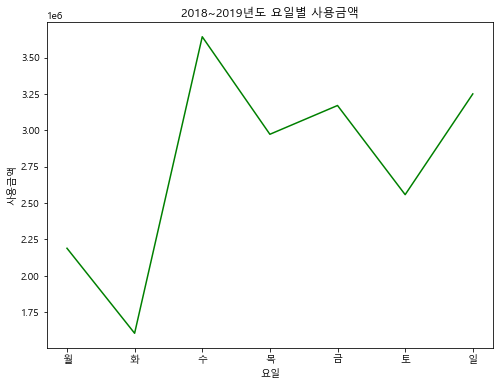

In [138]:
# 거래요일 별 거래금액
a = df_pay.groupby('거래요일')['거래금액'].sum().reindex(index = ['월','화','수','목','금','토','일']).reset_index()

x = a['거래요일']
y = a['거래금액']

plt.figure(figsize = (8, 6))
plt.plot(x, y, color = 'green')
plt.xlabel('요일')
plt.ylabel('사용금액')
plt.title('2018~2019년도 요일별 사용금액')

Text(0.5, 1.0, '2018~2019년도 거래내역 Top15')

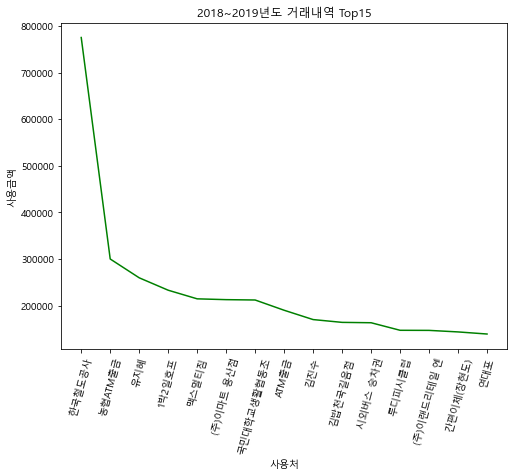

In [208]:
# 사용처 별 거래금액
a = df_pay.groupby('내용')['거래금액'].sum().reset_index().sort_values(by = '거래금액', ascending = False).head(50)

x = a['내용'][4:19]
y = a['거래금액'][4:19]

plt.figure(figsize = (8,6))
plt.plot(x, y, color = 'green')
plt.xticks(rotation = 75)
plt.xlabel('사용처')
plt.ylabel('사용금액')
plt.title('2018~2019년도 거래내역 Top15')

In [183]:
def time(x):
    if 0 <= x < 6:
        return '새벽'
    elif 6 <= x < 12:
        return '오전'
    elif 12 <= x < 18:
        return '오후'
    else:
        return '저녁'

In [210]:
a = df_pay.groupby('거래시간')['거래금액'].sum().reset_index()
a.head()

,거래시간,거래금액
0,0,861021
1,1,811489
2,2,163940
3,3,149460
4,4,240200


In [211]:
a['거래시간'] = a.거래시간.apply(lambda x : time(x))

In [212]:
a = a.groupby('거래시간')['거래금액'].sum().reset_index()
a

,거래시간,거래금액
0,새벽,2394310
1,오전,1189368
2,오후,7684086
3,저녁,8120175


Text(0.5, 1.0, '2018~2019년도 시간별 거래내역')

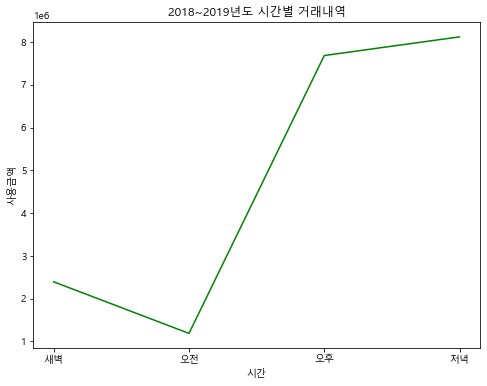

In [213]:
# 시간별 거래내역
x = a['거래시간']
y = a['거래금액']

plt.figure(figsize = (8, 6))
plt.plot(x, y, color = 'green')
plt.xlabel('시간')
plt.ylabel('사용금액')
plt.title('2018~2019년도 시간별 거래내역')